# Authors(from Ahmedabad University):

Shantanu Joshi - *BS in Computer Science, Minors in Mathematics*

Jeet Shah - *BTech. in Information and Communication Technology*

# Important 
Please run this cell below to install bnlearn

**You may have to restart you run-time after running this cell so that you can import bnlearn later**

In [1]:
!pip install bnlearn


     |████████████████████████████████| 42 kB 857 kB/s 
     |████████████████████████████████| 1.9 MB 37.1 MB/s 
     |████████████████████████████████| 132 kB 58.5 MB/s 
     |████████████████████████████████| 11.2 MB 46.7 MB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=eb9101320ff6160a04e170b1ab569ad14b5d98643ef075b21beb636abb10f7b7
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
!pip install matplotlib


In [1]:
!pip install EIA_python
!pip install fredapi
!pip install pgmpy
!pip install quandl
!pip install yfinance

**Why did we choose bnlearn  over other bayesian analysis implementations like pgmpy?**



1.   Build on top of the pgmpy library
2.   Contains the most-wanted bayesian pipelines
3.   Simple and intuitive
4.   Focus on structure learning, parameter learning and inference.









In [2]:
import bnlearn as bn
import quandl
import pgmpy
from fredapi import Fred
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
from IPython.display import Image, display

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#'9bbe800b4e1ae6bdb976750e74bbfcd6'
#initialise a session with the datacentre
quandl.ApiConfig.api_key='LvkRC41xqVW_WyfVGvkX'
fred=Fred(api_key='20ff22aaa4926899af46c436c1f41ecf')

# DATA TO USE IN OUR MODEL

Crude_OilOIL=West Texas Internmediate(WTISPLC)

**We will use THREE broad Factors which affect the price of Crude_Oil oil**


1.   FINANCIAL FACTORS
2.   ECONOMIC FACTORS
3.   TECHNICAL ANALYSYS FACTORS



# Importing Financial Data

**We will take the indices which play a factor in determining the fluctuation in the price of our Crude_Oil oil.**

GSPC=S&P500 index(which is a index of all top 500 company's in USA) 

DJI=Dow Jones Industrial Average

OVX=Crude_Oil Oil Volitilty Index

----------------------------
We use yahoo finance API to download Financial Data

In [4]:
data_list=[]#contains all datasets as list of series 


index_list=['^GSPC','^DWCOGS','^OVX']

import yfinance as yf
for i in index_list:
  
  INDEX=yf.download(i)['Adj Close']
  data_list.append(INDEX)

for i in range(len(data_list)):
 
  data_list[i].rename(index_list[i],inplace=True)

data_list

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[Date
 1950-01-03      16.660000
 1950-01-04      16.850000
 1950-01-05      16.930000
 1950-01-06      16.980000
 1950-01-09      17.080000
                  ...     
 2021-11-15    4682.799805
 2021-11-16    4700.899902
 2021-11-17    4688.669922
 2021-11-18    4704.540039
 2021-11-19    4697.959961
 Name: ^GSPC, Length: 18090, dtype: float64, Date
 2007-04-30    5326.149902
 2007-05-01    5344.629883
 2007-05-02    5388.660156
 2007-05-03    5436.259766
 2007-05-04    5432.850098
                  ...     
 2021-11-15    4612.810059
 2021-11-16    4616.890137
 2021-11-17    4528.629883
 2021-11-18    4503.779785
 2021-11-19    4341.569824
 Name: ^DWCOGS, Length: 3614, dtype: float64, Date
 2007-05-10    27.090000
 2007-05-11    26.410000
 2007-05-14    27.230000
 2007-05-15    27.889999
 2007-05-16    27.070000
                 ...    
 2021-11-15    36.419998
 2021-11-16    34.689999
 2021-11-17    33.750000
 2021-11-18    37.680000
 2021-11-19    37.130001
 Name: ^OVX, Length: 366

# Importing Economical Data

We are importing economic data from FRED-Frederal Reserve Economic Department's Open Source API. 


In [5]:
datasets_fred=['FRED/CPIENGSL',
'FRED/CAPG211S','FRED/RSXFS']

for i in datasets_fred:
  f=quandl.get(i,collapse='monthly')
  f.columns=[i]
  
  data_list.append(f)

data_list

[Date
 1950-01-03      16.660000
 1950-01-04      16.850000
 1950-01-05      16.930000
 1950-01-06      16.980000
 1950-01-09      17.080000
                  ...     
 2021-11-15    4682.799805
 2021-11-16    4700.899902
 2021-11-17    4688.669922
 2021-11-18    4704.540039
 2021-11-19    4697.959961
 Name: ^GSPC, Length: 18090, dtype: float64, Date
 2007-04-30    5326.149902
 2007-05-01    5344.629883
 2007-05-02    5388.660156
 2007-05-03    5436.259766
 2007-05-04    5432.850098
                  ...     
 2021-11-15    4612.810059
 2021-11-16    4616.890137
 2021-11-17    4528.629883
 2021-11-18    4503.779785
 2021-11-19    4341.569824
 Name: ^DWCOGS, Length: 3614, dtype: float64, Date
 2007-05-10    27.090000
 2007-05-11    26.410000
 2007-05-14    27.230000
 2007-05-15    27.889999
 2007-05-16    27.070000
                 ...    
 2021-11-15    36.419998
 2021-11-16    34.689999
 2021-11-17    33.750000
 2021-11-18    37.680000
 2021-11-19    37.130001
 Name: ^OVX, Length: 366

In [6]:
Crude_Oil_all_data=yf.download('CL=F')
Crude_Oil_close=yf.download('CL=F')['Adj Close']

Crude_Oil_close.rename('Crude_Oil',inplace=True)
data_list.append(Crude_Oil_close)

data_list

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[Date
 1950-01-03      16.660000
 1950-01-04      16.850000
 1950-01-05      16.930000
 1950-01-06      16.980000
 1950-01-09      17.080000
                  ...     
 2021-11-15    4682.799805
 2021-11-16    4700.899902
 2021-11-17    4688.669922
 2021-11-18    4704.540039
 2021-11-19    4697.959961
 Name: ^GSPC, Length: 18090, dtype: float64, Date
 2007-04-30    5326.149902
 2007-05-01    5344.629883
 2007-05-02    5388.660156
 2007-05-03    5436.259766
 2007-05-04    5432.850098
                  ...     
 2021-11-15    4612.810059
 2021-11-16    4616.890137
 2021-11-17    4528.629883
 2021-11-18    4503.779785
 2021-11-19    4341.569824
 Name: ^DWCOGS, Length: 3614, dtype: float64, Date
 2007-05-10    27.090000
 2007-05-11    26.410000
 2007-05-14    27.230000
 2007-05-15    27.889999
 2007-05-16    27.070000
                 ...    
 2021-11-15    36.419998
 2021-11-16    34.689999
 2021-11-17    33.750000
 2021-11-18    37.680000
 2021-11-19    37.130001
 Name: ^OVX, Length: 366

In [7]:
data=pd.concat(data_list,axis=1,join='inner')
data['forecast']=data['Crude_Oil'].shift(-1)
data

,^GSPC,^DWCOGS,^OVX,FRED/CPIENGSL,FRED/CAPG211S,FRED/RSXFS,Crude_Oil,forecast
Date,,,,,,,,
2007-05-31,1530.619995,5674.209961,28.440001,208.635,61.5084,334202.0,64.010002,78.209999
2007-07-31,1455.270020,5766.589844,30.690001,209.639,61.5774,332342.0,78.209999,74.040001
2007-08-31,1473.989990,5766.950195,28.860001,206.412,61.6198,334169.0,74.040001,94.529999
2007-10-31,1549.380005,6297.799805,37.459999,212.386,61.7215,337530.0,94.529999,88.709999
2007-11-30,1481.140015,6020.149902,37.259998,223.814,61.7818,341133.0,88.709999,95.980003
...,...,...,...,...,...,...,...,...
2021-03-31,3972.889893,3853.429932,45.650002,229.886,130.4557,559871.0,59.160000,63.580002
2021-04-30,4181.169922,3845.270020,38.389999,229.658,130.2351,562269.0,63.580002,73.470001
2021-06-30,4297.500000,4281.799805,32.740002,232.995,129.8558,554388.0,73.470001,68.500000


# Processing Technical Data

we will use the talib python module for downloading the technical analysis factors.

In [8]:
Crude_Oil_all_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-23,31.950001,32.799999,31.950001,32.049999,32.049999,79385
2000-08-24,31.900000,32.240002,31.400000,31.629999,31.629999,72978
2000-08-25,31.700001,32.099998,31.320000,32.049999,32.049999,44601
2000-08-28,32.040001,32.919998,31.860001,32.869999,32.869999,46770
2000-08-29,32.820000,33.029999,32.560001,32.720001,32.720001,49131
...,...,...,...,...,...,...
2021-11-16,80.930000,81.809998,80.029999,80.760002,80.760002,325668
2021-11-17,80.540001,80.690002,77.690002,78.360001,78.360001,174471
2021-11-18,78.339996,79.360001,77.080002,79.010002,79.010002,83984


In [9]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h516909a_0.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py37ha21ca33_2.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.7/dist-packages/ lib/python3.7/site-packages/talib --strip-components=3
#!pip install TA-Lib
#print(ta.get_function_groups())



import talib as ta


monthly=30

data['RSI']=ta.RSI(data['Crude_Oil'],timeperiod=14)
data['EMA']=ta.EMA(data['Crude_Oil'],timeperiod=50)
data['ADX'] = ta.ADX(Crude_Oil_all_data['High'],Crude_Oil_all_data['Low'],Crude_Oil_all_data['Close'],timeperiod=14)
macd, macdsignal, macdhist=ta.MACD(data['Crude_Oil'],fastperiod=21,slowperiod=26,signalperiod=9)
data['MACD']=macd

data['ATR'] = ta.ATR(Crude_Oil_all_data['High'],Crude_Oil_all_data['Low'],Crude_Oil_all_data['Close'], timeperiod=14)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3645    0  3645    0     0  43915      0 --:--:-- --:--:-- --:--:-- 43392
100  503k  100  503k    0     0  1226k      0 --:--:-- --:--:-- --:--:-- 1226k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3733    0  3733    0     0  42420      0 --:--:-- --:--:-- --:--:-- 42420
100  406k  100  406k    0     0  1202k      0 --:--:-- --:--:-- --:--:-- 1202k


In [10]:
columns=[] #list of all column names in the main dataframe
for i in data:
  columns.append(i)

for i in columns:

  data[i]=data[i].replace(np.NaN,data[i].mean())

data

,^GSPC,^DWCOGS,^OVX,FRED/CPIENGSL,FRED/CAPG211S,FRED/RSXFS,Crude_Oil,forecast,RSI,EMA,ADX,MACD,ATR
Date,,,,,,,,,,,,,
2007-05-31,1530.619995,5674.209961,28.440001,208.635,61.5084,334202.0,64.010002,78.209999,49.088109,71.740387,15.971198,-0.844357,1.630202
2007-07-31,1455.270020,5766.589844,30.690001,209.639,61.5774,332342.0,78.209999,74.040001,49.088109,71.740387,36.896519,-0.844357,1.719193
2007-08-31,1473.989990,5766.950195,28.860001,206.412,61.6198,334169.0,74.040001,94.529999,49.088109,71.740387,19.976236,-0.844357,1.766049
2007-10-31,1549.380005,6297.799805,37.459999,212.386,61.7215,337530.0,94.529999,88.709999,49.088109,71.740387,33.776692,-0.844357,2.747848
2007-11-30,1481.140015,6020.149902,37.259998,223.814,61.7818,341133.0,88.709999,95.980003,49.088109,71.740387,26.918744,-0.844357,3.248400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-31,3972.889893,3853.429932,45.650002,229.886,130.4557,559871.0,59.160000,63.580002,55.513787,55.035095,32.453468,-1.101888,2.622517
2021-04-30,4181.169922,3845.270020,38.389999,229.658,130.2351,562269.0,63.580002,73.470001,57.687384,55.370189,17.367773,-0.764067,1.909146
2021-06-30,4297.500000,4281.799805,32.740002,232.995,129.8558,554388.0,73.470001,68.500000,62.144382,56.079986,23.221796,-0.308062,1.679904


# Correlation between the random variables
We will see how many variables in our dataset in correlated so that we can get an idea of how they are working together and also try to compare the correlation with causality in the Bayes Net for comparisons and cross-checking.


In [11]:
X=data[['^GSPC',
 '^DWCOGS',
 '^OVX',
 'FRED/CPIENGSL',
 'FRED/CAPG211S',
 'FRED/RSXFS',
 'Crude_Oil',
 'RSI',
 'EMA',
 'ADX',
 'MACD',
 'ATR']].copy()

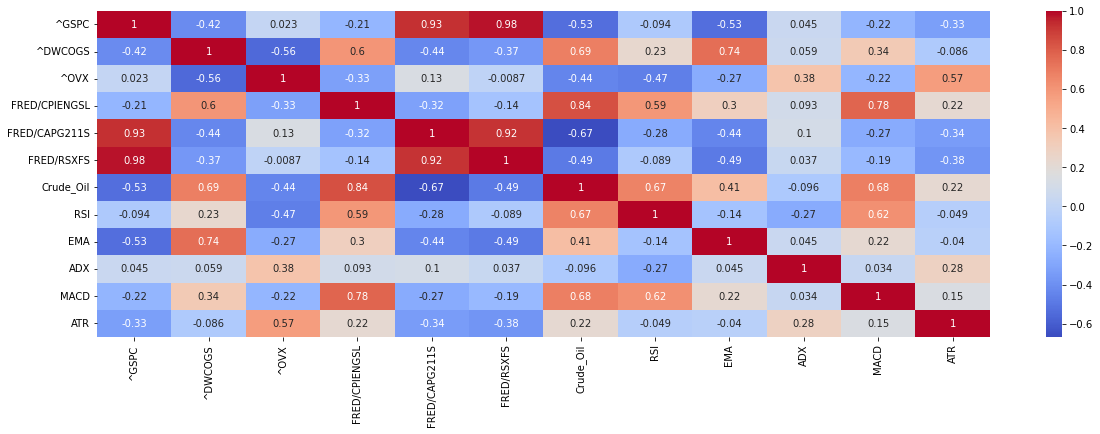

In [12]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(X.corr(),annot=True,cmap='coolwarm')
plt.show()

In [13]:
 def get_pair_above_threshold(X, threshold):
# Calculate the correlation matrix
    correl = X.corr()
    # Unstack the matrix
    correl = correl.abs().unstack()
    # Recurring & redundant pair
    pairs_to_drop = set()
    cols = X.corr().columns
    for i in range(0, X.corr().shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    # Drop the recurring & redundant pair
    correl = correl.drop(labels=pairs_to_drop) \
            .sort_values(ascending=False)
    return correl[correl>threshold].index
print(get_pair_above_threshold(X, 0.8))

data=data.drop('FRED/RSXFS',axis=1)
data=data.drop('FRED/CAPG211S',axis=1)


MultiIndex([(        '^GSPC',    'FRED/RSXFS'),
            (        '^GSPC', 'FRED/CAPG211S'),
            ('FRED/CAPG211S',    'FRED/RSXFS'),
            ('FRED/CPIENGSL',     'Crude_Oil')],
           )


# Data Discretization

We will find the difference in quantities of all the variables on our dataset.

and then set the valeus=1 if the change is positive else values=0 if change in the next month is negative.

Example: the price difference for FRED/WTISPLC for first month-(2007-07-31)

is 67.5774-61.508=0.0690 

In [14]:
data_diff=data.diff()[1:]
data_diff

,^GSPC,^DWCOGS,^OVX,FRED/CPIENGSL,Crude_Oil,forecast,RSI,EMA,ADX,MACD,ATR
Date,,,,,,,,,,,
2007-07-31,-75.349976,92.379883,2.250000,1.004,14.199997,-4.169998,0.000000,0.000000,20.925321,0.000000,0.088990
2007-08-31,18.719971,0.360352,-1.830000,-3.227,-4.169998,20.489998,0.000000,0.000000,-16.920283,0.000000,0.046856
2007-10-31,75.390015,530.849609,8.599998,5.974,20.489998,-5.820000,0.000000,0.000000,13.800455,0.000000,0.981799
2007-11-30,-68.239990,-277.649902,-0.200001,11.428,-5.820000,7.270004,0.000000,0.000000,-6.857948,0.000000,0.500551
2007-12-31,-12.780029,417.490234,-0.910000,1.835,7.270004,-4.230003,0.000000,0.000000,-7.109675,0.000000,-0.272365
...,...,...,...,...,...,...,...,...,...,...,...
2021-03-31,216.819824,862.750000,7.820000,26.170,10.639999,4.420002,5.770864,0.168363,1.392733,0.304117,1.222418
2021-04-30,208.280029,-8.159912,-7.260002,-0.228,4.420002,9.889999,2.173597,0.335094,-15.085694,0.337822,-0.713370
2021-06-30,116.330078,436.529785,-5.649998,3.337,9.889999,-4.970001,4.456998,0.709797,5.854023,0.456005,-0.229242


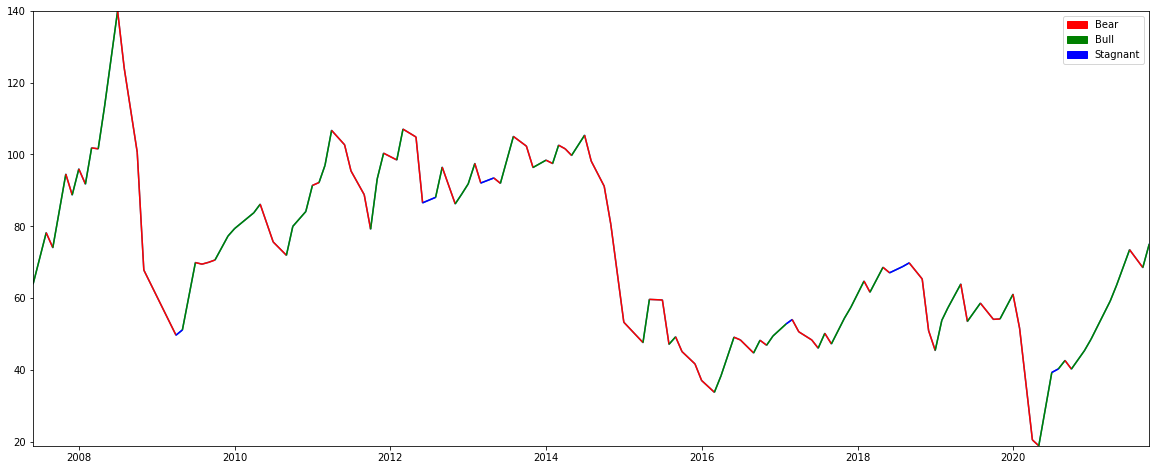

In [15]:

import matplotlib.dates as mdates
import matplotlib.patches as mpatches
from matplotlib.collections import LineCollection
from matplotlib.colors import Colormap, ListedColormap, BoundaryNorm
fig, ax1 = plt.subplots(figsize=(20,8));
ax1.plot(data['Crude_Oil']);
# Make 0 (Bear) - red, 1 (Stagnant) - blue, 2 (Bull) - green

cmap = ListedColormap(['r','b','g'],'indexed');
norm = BoundaryNorm(range(3 + 1), cmap.N);

inxval = mdates.date2num(data['Crude_Oil'].index.to_pydatetime());
points = np.array([inxval, data['Crude_Oil']]).T.reshape(-1, 1, 2);
segments = np.concatenate([points[:-1], points[1:]], axis=1);

lc = LineCollection(segments, cmap=cmap, norm=norm);
lc.set_array(data_diff['Crude_Oil']);

plt.gca().add_collection(lc);
plt.xlim(data['Crude_Oil'].index.min(), data['Crude_Oil'].index.max());
plt.ylim(data['Crude_Oil'].min(), data['Crude_Oil'].max());

r_patch = mpatches.Patch(color='red', label='Bear');
g_patch = mpatches.Patch(color='green', label='Bull');
b_patch = mpatches.Patch(color='blue', label='Stagnant');

plt.legend(handles=[r_patch, g_patch, b_patch]);
plt.show();

# Data discretization Step 2

1= Bull,0= Bear

Why we chose ^OVX ?

Volatility means how much something moves. High volatility means that a stock's price moves a lot. ... In the long term, volatility is good for traders because it gives them opportunities. Without volatility there would be no trading opportunities and no traders.

In [16]:
data_diff.isna().sum()

^GSPC            0
^DWCOGS          0
^OVX             0
FRED/CPIENGSL    0
Crude_Oil        0
forecast         0
RSI              0
EMA              0
ADX              0
MACD             0
ATR              0
dtype: int64

In [17]:
data_diff1=np.where(data_diff>0,1,0)
data_diff1

array([[0, 1, 1, ..., 1, 0, 1],
       [1, 1, 0, ..., 0, 0, 1],
       [1, 1, 1, ..., 1, 0, 1],
       ...,
       [1, 1, 0, ..., 1, 1, 0],
       [1, 0, 1, ..., 0, 1, 1],
       [0, 1, 1, ..., 0, 1, 0]])

In [18]:
columns=[] #list of all column names in the main dataframe
for i in data:
  columns.append(i)
columns

['^GSPC',
 '^DWCOGS',
 '^OVX',
 'FRED/CPIENGSL',
 'Crude_Oil',
 'forecast',
 'RSI',
 'EMA',
 'ADX',
 'MACD',
 'ATR']

# Creation of discretized DataFrame


In [19]:
mydata=pd.DataFrame(data_diff1,columns=[columns])
mydata

,^GSPC,^DWCOGS,^OVX,FRED/CPIENGSL,Crude_Oil,forecast,RSI,EMA,ADX,MACD,ATR
0,0,1,1,1,1,0,0,0,1,0,1
1,1,1,0,0,0,1,0,0,0,0,1
2,1,1,1,1,1,0,0,0,1,0,1
3,0,0,0,1,0,1,0,0,0,0,1
4,0,1,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
114,1,1,1,1,1,1,1,1,1,1,1
115,1,0,0,0,1,1,1,1,0,1,0
116,1,1,0,1,1,0,1,1,1,1,0
117,1,0,1,1,0,1,0,1,0,1,1


In [20]:
from google.colab import files
mydata.to_csv('DATASET.csv')

In [21]:
df = pd.read_csv('/content/DATASET.csv')
mydata=df.drop(['Unnamed: 0'],axis=1)
mydata

,^GSPC,^DWCOGS,^OVX,FRED/CPIENGSL,Crude_Oil,forecast,RSI,EMA,ADX,MACD,ATR
0,0,1,1,1,1,0,0,0,1,0,1
1,1,1,0,0,0,1,0,0,0,0,1
2,1,1,1,1,1,0,0,0,1,0,1
3,0,0,0,1,0,1,0,0,0,0,1
4,0,1,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
114,1,1,1,1,1,1,1,1,1,1,1
115,1,0,0,0,1,1,1,1,0,1,0
116,1,1,0,1,1,0,1,1,1,1,0
117,1,0,1,1,0,1,0,1,0,1,1


In [22]:
mydata.isna().sum()

^GSPC            0
^DWCOGS          0
^OVX             0
FRED/CPIENGSL    0
Crude_Oil        0
forecast         0
RSI              0
EMA              0
ADX              0
MACD             0
ATR              0
dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test=train_test_split(mydata,test_size=0.2,shuffle=False)


# Structure Learning
**Learning a Bayesian network can be split into:**
  * Structure learning: Given a set of data samples, estimate a DAG that captures the dependencies between the variables.
  * Parameter learning:  estimate the (conditional) probability distributions(or CPT) of the individual variables.
  



We use bn.structure_learning.fit() to learn the structure of the Directed Acyclic Graph(DAG) of the dsicretized dataset provided above.

and then plot the model using bn.plot()




Structure learning for discrete, fully observed networks:
    
*    Score-based structure estimation (BIC/BDeu/K2 score; exhaustive search, hill climb/tabu search)
*   Constraint-based structure estimation (PC)
*   Hybrid structure estimation (MMHC)



[bnlearn] >Warning: Computing DAG with 11 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [k2]
[bnlearn] >Warning: Computing DAG with 11 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bdeu]
[bnlearn] >Warning: Computing DAG with 11 nodes can take a very long time!
[bnlearn] >Computing best DAG using [chow-liu]


Building tree:   0%|          | 0/55.0 [00:00<?, ?it/s]

Model_hc_k2
[bnlearn]> Set node properties.
[bnlearn] >Plot based on BayesianModel


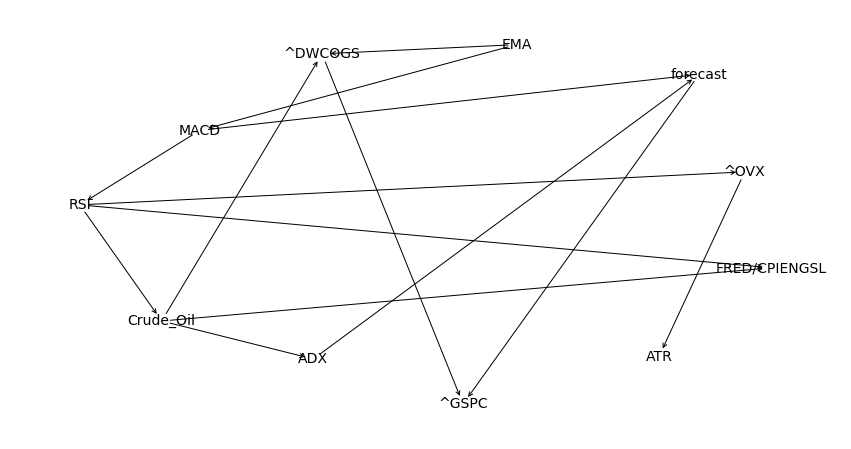

Model_hc_bdeu
[bnlearn]> Set node properties.
[bnlearn] >Plot based on BayesianModel


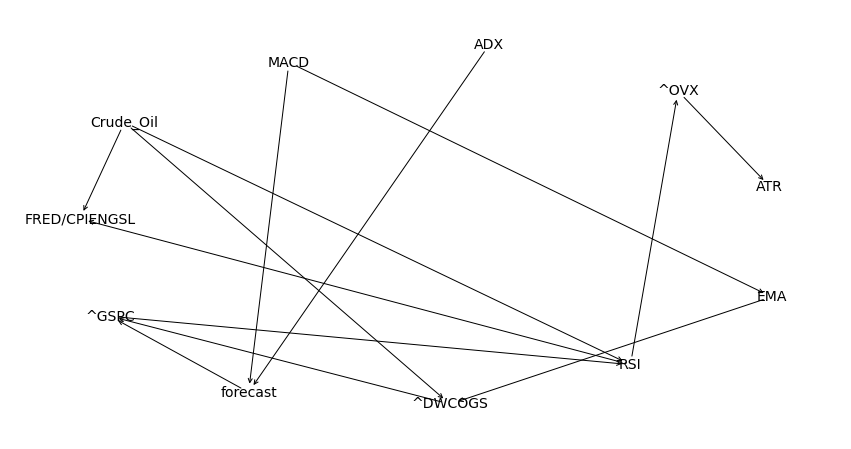

Model_cl
[bnlearn]> Set node properties.
[bnlearn] >Plot based on BayesianModel


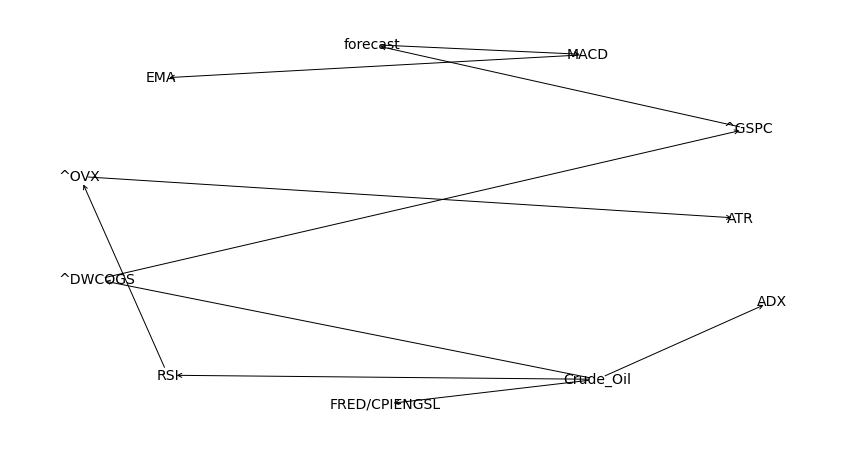

In [76]:
model_hc_k2 = bn.structure_learning.fit(X_train,methodtype='hc',scoretype='k2')

model_hc_bdeu = bn.structure_learning.fit(X_train, methodtype='hc', scoretype='bdeu')
model_cl = bn.structure_learning.fit(X_train, methodtype='cl', root_node='Crude_Oil')


print('Model_hc_k2')
DAG_1=bn.plot(model_hc_k2,scale=40,node_size=0)

print('Model_hc_bdeu')
DAG_3=bn.plot(model_hc_bdeu,scale=40,node_size=0)

print('Model_cl')
DAG_4=bn.plot(model_cl,scale=40,node_size=0)

#bn.compare_networks(model_hc_k2,model_hc_bdeu)       

Parameter learning for discrete nodes:

*   Maximum Likelihood Estimation
*   Bayesian Estimation
    

In [77]:
model_mle = bn.parameter_learning.fit(model_hc_k2,X_train,methodtype='maximumlikelihood')
print('\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\')

model_mle_bdeu = bn.parameter_learning.fit(model_hc_bdeu,X_train,methodtype='maximumlikelihood')
print('\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\')
model_mle_cl_ = bn.parameter_learning.fit(model_cl,X_train,methodtype='maximumlikelihood')
print('\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\')

[bnlearn] >Parameter learning> Computing parameters using [maximumlikelihood]
[bnlearn] >Conversion of adjmat to BayesianModel.
[bnlearn] >CPD of ^DWCOGS:
+------------+---------------------+-----+--------------------+
| Crude_Oil  | Crude_Oil(0)        | ... | Crude_Oil(1)       |
+------------+---------------------+-----+--------------------+
| EMA        | EMA(0)              | ... | EMA(1)             |
+------------+---------------------+-----+--------------------+
| ^DWCOGS(0) | 0.8157894736842105  | ... | 0.1111111111111111 |
+------------+---------------------+-----+--------------------+
| ^DWCOGS(1) | 0.18421052631578946 | ... | 0.8888888888888888 |
+------------+---------------------+-----+--------------------+
[bnlearn] >CPD of ^GSPC:
+----------+---------------------+-----+--------------------+-------------+
| ^DWCOGS  | ^DWCOGS(0)          | ... | ^DWCOGS(1)         | ^DWCOGS(1)  |
+----------+---------------------+-----+--------------------+-------------+
| forecast | for

#Inferece for HC_K2(MAIN)

* Inferences: Compute probabilities given the CPT and DAG.

In [78]:
forecasted_hc_k2=X_test.drop('forecast',axis=1)



test_predict_hc_k2 = bn.predict(model_mle,forecasted_hc_k2,variables=['forecast'])


test_predict_hc_k2.describe().transpose()
forecast_predict_hc_k2=test_predict_hc_k2['forecast'].values

Crude_Oil=X_test['Crude_Oil']
#Crude_Oil.values
Crude_Oil

error=np.mean(Crude_Oil!=np.roll(forecast_predict_hc_k2,1))
accuracy_hc_k2=1-error

print('\n')
print('accuracy= '+str(round(accuracy_hc_k2*100,3))+' %')
print('error= '+ str(round(error*100,3))+' %')





forecasted_cl=X_test.drop('forecast',axis=1)


[bnlearn]> Remaining columns for inference: 10


100%|██████████| 18/18 [00:00<00:00, 35.01it/s]




accuracy= 70.833 %
error= 29.167 %


#Inferece for HC_BDEU

In [79]:
forecasted_hc_bdeu=X_test.drop('forecast',axis=1)

test_predict_hc_bdeu = bn.predict(model_mle_bdeu,forecasted_hc_bdeu,variables=['forecast'])


test_predict_hc_bdeu.describe().transpose()
forecast_predict_hc_bdeu=test_predict_hc_bdeu['forecast'].values

Crude_Oil=X_test['Crude_Oil']
#Crude_Oil.values
Crude_Oil

error=np.mean(Crude_Oil!=np.roll(forecast_predict_hc_bdeu,1))
accuracy_hc_bdeu=1-error

print('\n')
print('accuracy= '+str(round(accuracy_hc_bdeu*100,3))+' %')
print('error= '+ str(round(error*100,3))+' %')


[bnlearn]> Remaining columns for inference: 10


100%|██████████| 18/18 [00:00<00:00, 38.17it/s]



accuracy= 70.833 %
error= 29.167 %


#Inferece for CL

In [80]:
forecasted_cl=X_test.drop('forecast',axis=1)

test_predict_cl = bn.predict(model_mle_cl_,forecasted_cl,variables=['forecast'])


test_predict_cl.describe().transpose()
forecast_predict_cl=test_predict_cl['forecast'].values

Crude_Oil=X_test['Crude_Oil']
#Crude_Oil.values
Crude_Oil

error=np.mean(Crude_Oil!=np.roll(forecast_predict_cl,1))
accuracy_cl=1-error

print('\n')
print('accuracy= '+str(round(accuracy_cl*100,3))+' %')
print('error= '+ str(round(error*100,3))+' %')



[bnlearn]> Remaining columns for inference: 10


100%|██████████| 18/18 [00:00<00:00, 52.56it/s]



accuracy= 54.167 %
error= 45.833 %


In [84]:
accuracy_frame=pd.DataFrame([{'Accuracy of HC_K2':accuracy_hc_k2,'Accuracy of HC_BDEU':accuracy_hc_bdeu,'Accuracy of Chow Liu':accuracy_cl}])
accuracy_frame

,Accuracy of HC_K2,Accuracy of HC_BDEU,Accuracy of Chow Liu
0,0.708333,0.708333,0.541667
